# Import modules

Open this notebook in kaggle notebooks or you can use google colab as well but need to download datasets by provided links

links: 

1. https://www.kaggle.com/datasets/ejlok1/cremad
2. https://www.kaggle.com/datasets/uwrfkaggler/ravdess-emotional-speech-audio
3. https://www.kaggle.com/datasets/barelydedicated/savee-database

In [2]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

import librosa
import librosa.display
from IPython.display import Audio
import warnings


import keras
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint




warnings.filterwarnings("ignore")


# Load dataset

dataset links:

1. https://www.kaggle.com/datasets/ejlok1/cremad
2. https://www.kaggle.com/datasets/uwrfkaggler/ravdess-emotional-speech-audio
3. https://www.kaggle.com/datasets/barelydedicated/savee-database

In [3]:
# Paths for data.
Cremad = "/kaggle/input/cremad/AudioWAV"
Ravdess = "/kaggle/input/ravdess-emotional-speech-audio/audio_speech_actors_01-24/"
Savee = "/kaggle/input/savee-database/AudioData"

## Crema D

In [4]:
crema_dir = os.listdir(Cremad)

emotions = []
paths = []

for file in crema_dir:
    # storing file paths
    paths.append(Cremad+"/" + file)
    # storing file emotions
    part=file.split('_')
    emotions.append(part[2])
    
#  Creating dataframe out of lists       
emotion_df = pd.DataFrame(emotions, columns=['Emotions'])
path_df = pd.DataFrame(paths, columns=['Path'])


Crema_df = pd.concat([emotion_df, path_df], axis=1)

e_dict={'DIS':'disgusted', 'HAP':'happy', 'SAD':'sad', 'FEA':'fear', 'ANG':'angry', 'NEU':'neutral'}
Crema_df["Emotions"]=Crema_df["Emotions"].apply(lambda x : e_dict[x])

del emotion_df
del path_df

Crema_df.head()

Emotions                                               Path
0  disgusted  /kaggle/input/cremad/AudioWAV/1028_TSI_DIS_XX.wav
1      happy  /kaggle/input/cremad/AudioWAV/1075_IEO_HAP_LO.wav
2      happy  /kaggle/input/cremad/AudioWAV/1084_ITS_HAP_XX.wav
3  disgusted  /kaggle/input/cremad/AudioWAV/1067_IWW_DIS_XX.wav
4  disgusted  /kaggle/input/cremad/AudioWAV/1066_TIE_DIS_XX.wav

In [5]:
Crema_df["Emotions"].value_counts()

disgusted    1271
happy        1271
sad          1271
fear         1271
angry        1271
neutral      1087
Name: Emotions, dtype: int64

## Ravdess

In [6]:
ravdess_directory_list = os.listdir(Ravdess)
file_emotion = []

file_path = []
for i in ravdess_directory_list:
    actor = os.listdir(Ravdess +"/"+ i)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        # third part in each file is emotion
        file_emotion.append(int(part[2]))
        file_path.append(Ravdess+"/" + i + '/' + file)
        
# list to dataframe
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
path_df = pd.DataFrame(file_path, columns=['Path'])

# Combining 
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

# int to emotion
Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgusted', 8:'surprised'}, inplace=True)
Ravdess_df.head()

Emotions                                               Path
0  surprised  /kaggle/input/ravdess-emotional-speech-audio/a...
1    neutral  /kaggle/input/ravdess-emotional-speech-audio/a...
2  disgusted  /kaggle/input/ravdess-emotional-speech-audio/a...
3  disgusted  /kaggle/input/ravdess-emotional-speech-audio/a...
4    neutral  /kaggle/input/ravdess-emotional-speech-audio/a...

In [7]:
Ravdess_df["Emotions"].value_counts()

surprised    192
disgusted    192
fear         192
sad          192
calm         192
happy        192
angry        192
neutral       96
Name: Emotions, dtype: int64

## SAVEE

### Info.txt =>
--------------------------------------
Speakers
--------------------------------------
'DC', 'JE', 'JK' and 'KL' are four male speakers recorded for the SAVEE database


--------------------------------------
Audio data 
--------------------------------------
Audio files consist of audio WAV files sampled at 44.1 kHz

There are 15 sentences for each of the 7 emotion categories.
The initial letter(s) of the file name represents the emotion class, and the following digits represent the sentence number.
The letters 'a', 'd', 'f', 'h', 'n', 'sa' and 'su' represent 'anger', 'disgust', 'fear', 'happiness', 'neutral', 'sadness' and 'surprise' emotion classes respectively. 
E.g., 'd03.wav' is the 3rd disgust sentence. 


In [8]:
# used "next" with "walk" cause "os.listdir" gives error 
directory_list = next(os.walk('/kaggle/input/savee-database/AudioData'))[1]
file_emotion = []

file_path = []
for i in directory_list:
    actor = os.listdir(Savee +"/"+ i)
    for file in actor:       
        file_emotion.append(file[:-6])
        file_path.append(Savee+"/" + i + '/' + file)
        
# list to dataframe
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
path_df = pd.DataFrame(file_path, columns=['Path'])

# Combining 
Savee_df = pd.concat([emotion_df, path_df], axis=1)

# letter to full emotion
Savee_df.Emotions.replace({'a':'angry', 'd':'disgusted', 'f':'fear', 'h':'happy', 'n':'neutral', 'sa':'sad' , 'su':'surprised'}, inplace=True)
Savee_df.head()

Emotions                                               Path
0    neutral  /kaggle/input/savee-database/AudioData/DC/n26.wav
1  surprised  /kaggle/input/savee-database/AudioData/DC/su06...
2  surprised  /kaggle/input/savee-database/AudioData/DC/su01...
3      happy  /kaggle/input/savee-database/AudioData/DC/h10.wav
4  surprised  /kaggle/input/savee-database/AudioData/DC/su10...

In [9]:
# creating Dataframe using above 3 dataframes.
df = pd.concat([Ravdess_df, Crema_df, Savee_df], axis = 0)
df.to_csv("data.csv",index=False)
df.head()

Emotions                                               Path
0  surprised  /kaggle/input/ravdess-emotional-speech-audio/a...
1    neutral  /kaggle/input/ravdess-emotional-speech-audio/a...
2  disgusted  /kaggle/input/ravdess-emotional-speech-audio/a...
3  disgusted  /kaggle/input/ravdess-emotional-speech-audio/a...
4    neutral  /kaggle/input/ravdess-emotional-speech-audio/a...

In [10]:
df.reset_index(drop=True,inplace=True)

In [11]:
df["Emotions"].value_counts()

disgusted    1523
fear         1523
sad          1523
happy        1523
angry        1523
neutral      1303
surprised     252
calm          192
Name: Emotions, dtype: int64

**EDA**

<AxesSubplot:xlabel='Emotions', ylabel='count'>

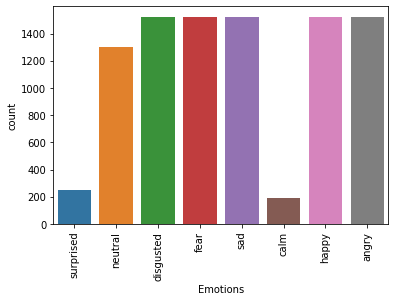

In [14]:
import matplotlib.pyplot as plt
plt.xticks( rotation='vertical')
sns.countplot(df["Emotions"])

In [15]:
def waveplot(data,sr,emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion,size=20)
    librosa.display.waveshow(data,sr=sr)
    plt.show()

def spectogram(data,sr,emotion):
    x=librosa.stft(data)
    xdb=librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion,size=20)
    librosa.display.specshow(xdb,sr=sr,x_axis="time",y_axis="hz")
    plt.colorbar()



In [175]:
emot=["disgusted","fear","sad","happy","angry","neutral","surprised","calm"]

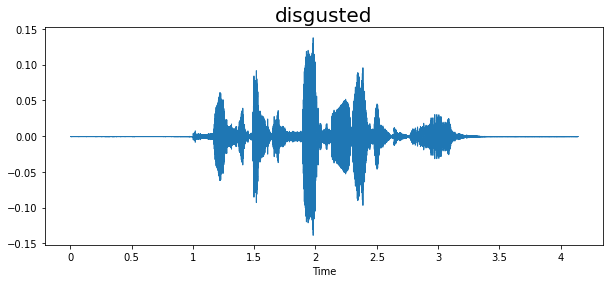

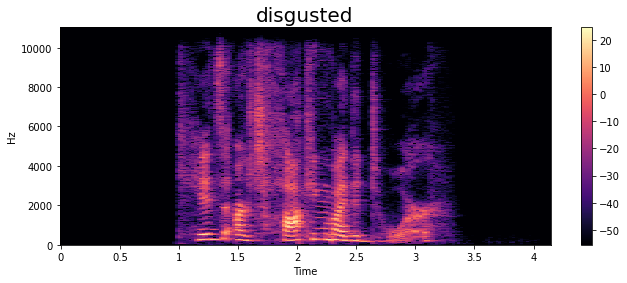

In [17]:
emotion=emot[0]
path=np.array(df["Path"][df["Emotions"]==emotion])[0]
data,sampling_rate=librosa.load(path)

waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

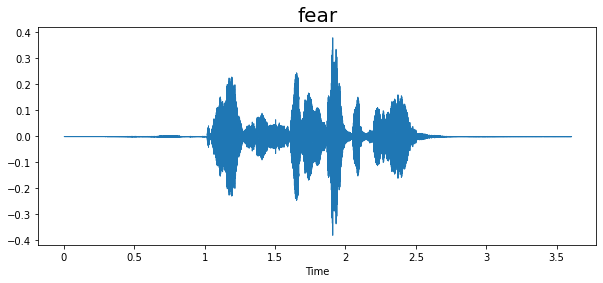

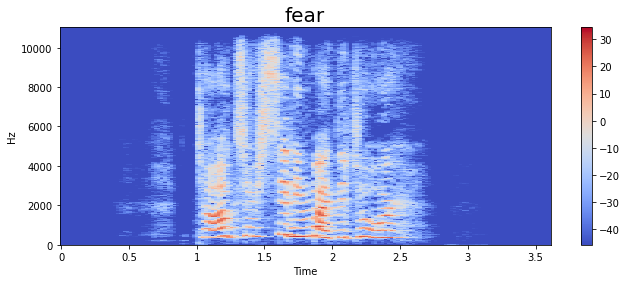

In [18]:
emotion=emot[1]
path=np.array(df["Path"][df["Emotions"]==emotion])[0]
data,sampling_rate=librosa.load(path)

waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

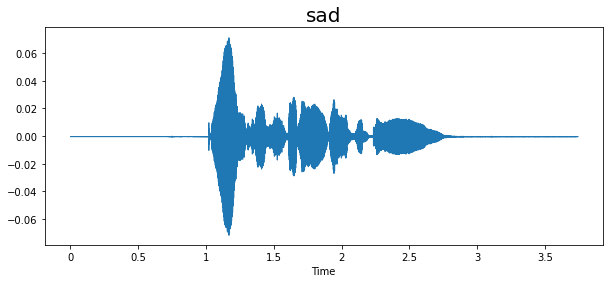

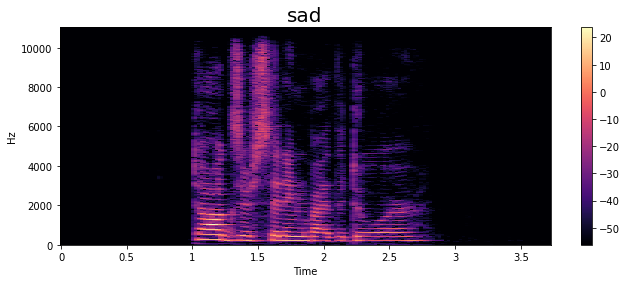

In [19]:
emotion=emot[2]
path=np.array(df["Path"][df["Emotions"]==emotion])[0]
data,sampling_rate=librosa.load(path)

waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

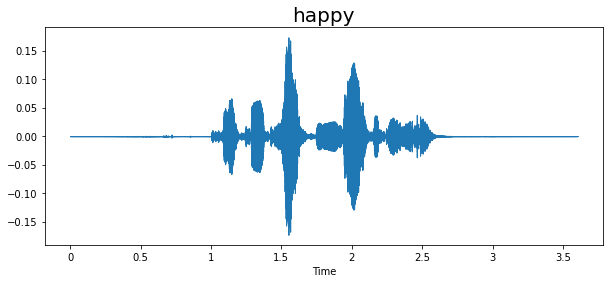

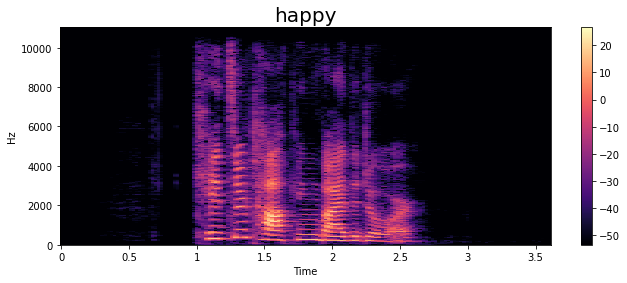

In [20]:
emotion=emot[3]
path=np.array(df["Path"][df["Emotions"]==emotion])[0]
data,sampling_rate=librosa.load(path)

waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

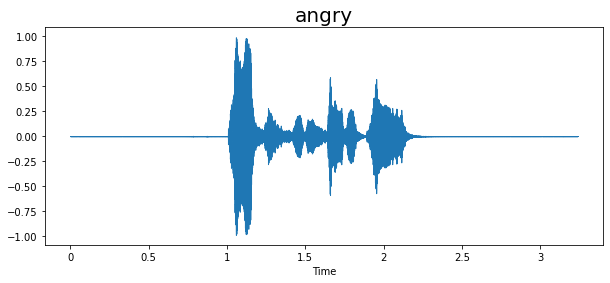

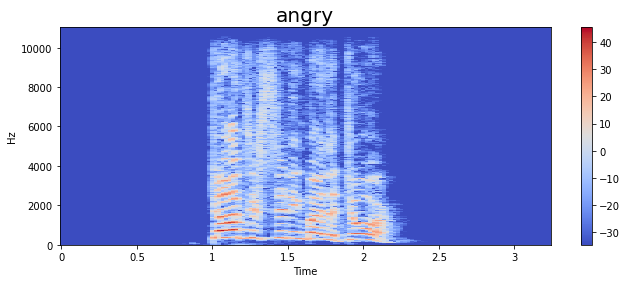

In [21]:
emotion=emot[4]
path=np.array(df["Path"][df["Emotions"]==emotion])[100]
data,sampling_rate=librosa.load(path)

waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)


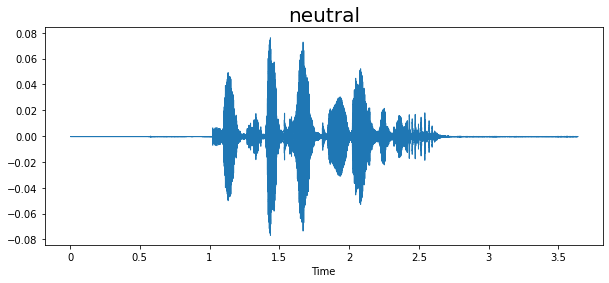

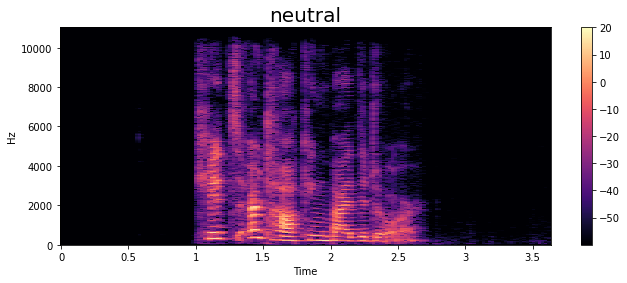

In [22]:
emotion=emot[5]
path=np.array(df["Path"][df["Emotions"]==emotion])[0]
data,sampling_rate=librosa.load(path)

waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

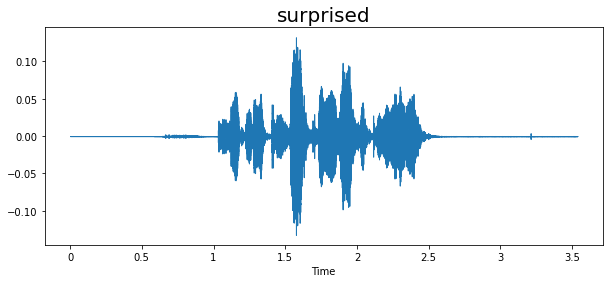

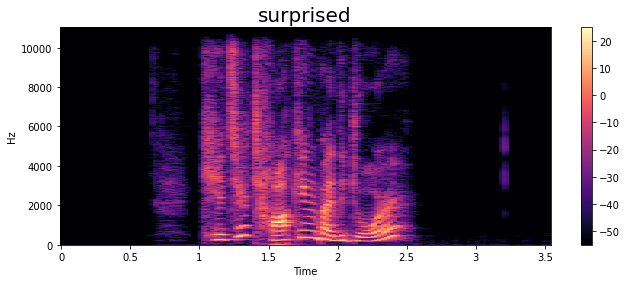

In [177]:
emotion=emot[6]
path=np.array(df["Path"][df["Emotions"]==emotion])[0]
data,sampling_rate=librosa.load(path)

waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

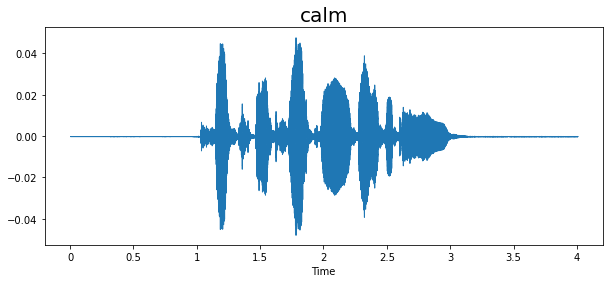

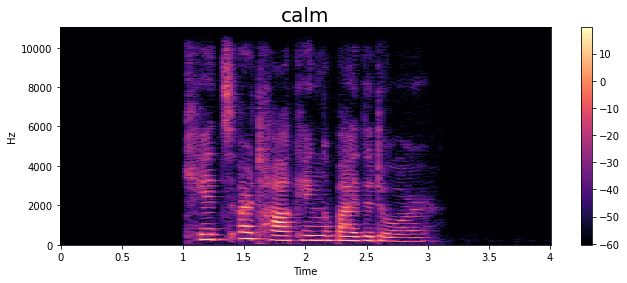

In [178]:
emotion=emot[7]
path=np.array(df["Path"][df["Emotions"]==emotion])[0]
data,sampling_rate=librosa.load(path)

waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

**plots for all the labels is done**

# Data Augmentation

In [23]:
def noise(data):
    noise_amp = 0.030*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.75):
    return librosa.effects.time_stretch(data, rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

# taking any example and checking for techniques.
path = np.array(df.Path)[1]
data, sample_rate = librosa.load(path)

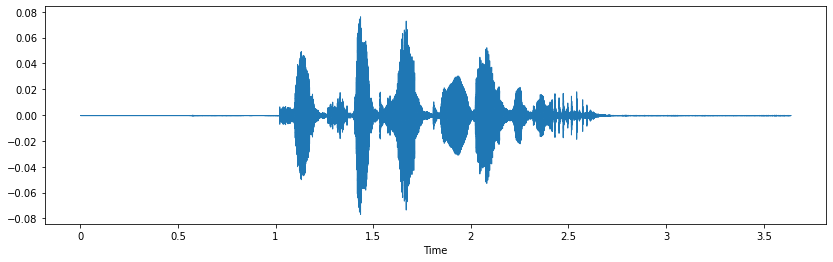

In [24]:
# simple
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=data, sr=sample_rate)
Audio(path)

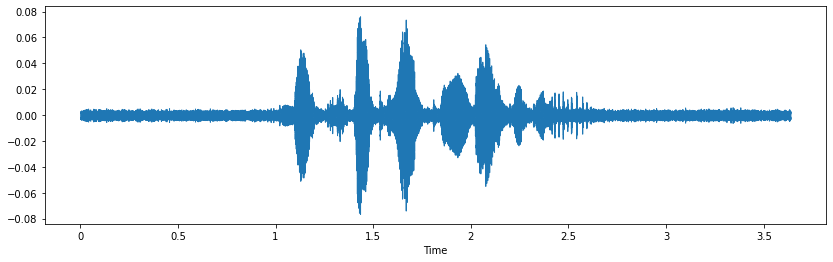

In [25]:
# noise
x = noise(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)


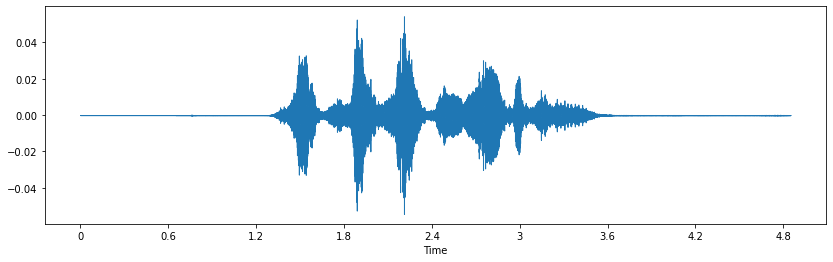

In [26]:
# stretching
x = stretch(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

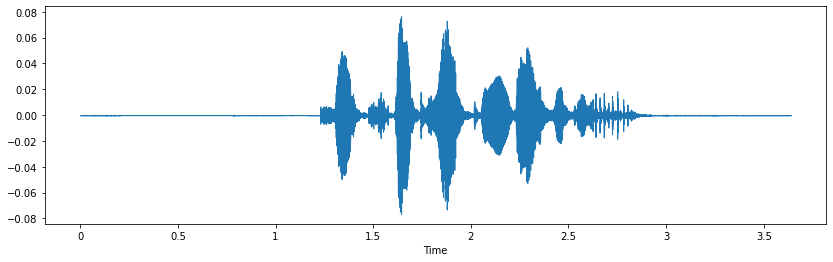

In [27]:
# shifting
x = shift(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

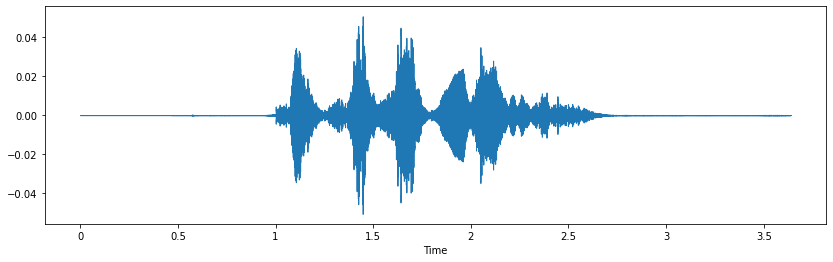

In [28]:
# pitch
x = pitch(data, sample_rate)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

# Feature Extraction

In [29]:
def extract_features(data):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) 

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc)) 

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) 

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) 
    
    return result

def get_features(path):
    # duration and offset are used to take care of 
#     the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    
    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)
    
    # with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) 
    
    # stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res3)) 
    
    return result

In [40]:
X, Y = [], []

di=zip(df["Path"], df["Emotions"])
for path, emotion in di :
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        Y.append(emotion)

In [41]:
len(X), len(Y), df["Path"].shape


(28086, 28086, (9362,))

In [46]:
new_df = pd.DataFrame(X)
new_df['Emotions'] = Y
new_df.to_csv('dataframe.csv', index=False)
new_df.head()

0         1         2         3         4         5         6  \
0  0.231174  0.682377  0.670623  0.614065  0.563172  0.533576  0.632021   
1  0.289144  0.703345  0.698677  0.672458  0.654420  0.696610  0.698564   
2  0.179606  0.694931  0.643050  0.625386  0.572231  0.514469  0.577552   
3  0.239882  0.625256  0.583587  0.597744  0.604833  0.585755  0.600098   
4  0.238430  0.626256  0.605930  0.646440  0.675611  0.645555  0.613366   

          7         8         9  ...       153       154       155       156  \
0  0.667523  0.663989  0.670007  ...  0.000234  0.000235  0.000138  0.000127   
1  0.700823  0.673174  0.688850  ...  0.000328  0.000343  0.000238  0.000227   
2  0.655644  0.673880  0.653182  ...  0.000057  0.000070  0.000073  0.000051   
3  0.653400  0.701742  0.685137  ...  0.000018  0.000016  0.000013  0.000012   
4  0.661494  0.707571  0.693269  ...  0.000020  0.000017  0.000014  0.000013   

        157       158       159           160           161   Emotions  
0  0.000266  0.000227  0.000053  5.206115e-06  1.516035e-07  surprised  
1  0.000362  0.000323  0.000157  1.109712e-04  9.943707e-05  surprised  
2  0.000023  0.000034  0.000019  1.267915e-06  4.036176e-09  surprised  
3  0.000006  0.000005  0.000002  1.253346e-07  4.100352e-09    neutral  
4  0.000007  0.000006  0.000003  1.232030e-06  1.183101e-06    neutral  

[5 rows x 163 columns]

## Data Preparaion

In [152]:
X = new_df.iloc[: ,:-1].values
Y = new_df['Emotions'].values

In [153]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [154]:
from sklearn.model_selection import train_test_split
# splitting data
x_train, x_test, y_train, y_test = train_test_split(X, Y,test_size=0.20 , shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((22468, 162), (22468, 8), (5618, 162), (5618, 8))

In [155]:
from sklearn.preprocessing import StandardScaler
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((22468, 162), (22468, 8), (5618, 162), (5618, 8))

In [156]:
# making our data compatible to model.
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)


In [157]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((22468, 162, 1), (22468, 8), (5618, 162, 1), (5618, 8))

# Create the model

In [158]:
# model

model = Sequential()
model.add(Conv1D(128, 3, activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D((1)))
model.add(Conv1D(256, 3, activation='relu'))
model.add(MaxPooling1D((1)))
model.add(Conv1D(512, 3, activation='relu'))
model.add(MaxPooling1D((1)))
model.add(Conv1D(1024, 3, activation='relu'))
model.add(MaxPooling1D((1)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(8, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer="adam",
             metrics=['accuracy'])

model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_56 (Conv1D)           (None, 160, 128)          512       
_________________________________________________________________
max_pooling1d_56 (MaxPooling (None, 160, 128)          0         
_________________________________________________________________
conv1d_57 (Conv1D)           (None, 158, 256)          98560     
_________________________________________________________________
max_pooling1d_57 (MaxPooling (None, 158, 256)          0         
_________________________________________________________________
conv1d_58 (Conv1D)           (None, 156, 512)          393728    
_________________________________________________________________
max_pooling1d_58 (MaxPooling (None, 156, 512)          0         
_________________________________________________________________
conv1d_59 (Conv1D)           (None, 154, 1024)       

In [159]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping


es=EarlyStopping(monitor='val_accuracy',patience=3)
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0000001)
model_22=model.fit(x_train, y_train, batch_size=128, epochs=50, validation_data=(x_test, y_test),callbacks=[rlrp,es])

Epoch 1/50
176/176 [==============================] - 13s 70ms/step - loss: 1.6522 - accuracy: 0.3311 - val_loss: 1.4677 - val_accuracy: 0.4089
Epoch 2/50
176/176 [==============================] - 12s 68ms/step - loss: 1.4464 - accuracy: 0.4219 - val_loss: 1.3828 - val_accuracy: 0.4546
Epoch 3/50
176/176 [==============================] - 12s 69ms/step - loss: 1.3268 - accuracy: 0.4790 - val_loss: 1.2802 - val_accuracy: 0.4883
Epoch 4/50
176/176 [==============================] - 12s 69ms/step - loss: 1.2054 - accuracy: 0.5309 - val_loss: 1.2196 - val_accuracy: 0.5247
Epoch 5/50
176/176 [==============================] - 12s 69ms/step - loss: 1.0550 - accuracy: 0.5964 - val_loss: 1.1623 - val_accuracy: 0.5593
Epoch 6/50
176/176 [==============================] - 12s 69ms/step - loss: 0.8934 - accuracy: 0.6597 - val_loss: 1.1324 - val_accuracy: 0.5726
Epoch 7/50
176/176 [==============================] - 12s 68ms/step - loss: 0.7382 - accuracy: 0.7218 - val_loss: 1.1078 - val_accuracy:

In [161]:
num_epochs=26

176/176 [==============================] - 1s 8ms/step - loss: 1.8498 - accuracy: 0.6497
Testing accuracy of our model:  64.96974229812622 %


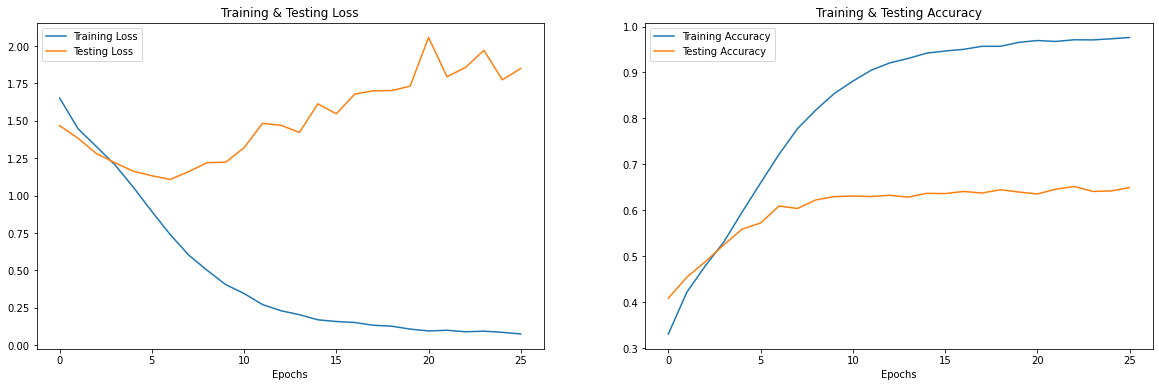

In [162]:
print("Testing accuracy of our model: " , model.evaluate(x_test,y_test)[1]*100 , "%")

epochs = [i for i in range(num_epochs)]
fig , ax = plt.subplots(1,2)
train_acc = model_22.history['accuracy']
train_loss = model_22.history['loss']
test_acc = model_22.history['val_accuracy']
test_loss = model_22.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [163]:
# predicting on test data.
pred_test = model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)

y_test = encoder.inverse_transform(y_test)

In [164]:
c_df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
c_df['Predicted Labels'] = y_pred.flatten()
c_df['Actual Labels'] = y_test.flatten()

In [172]:
c_df.sample(10)

Predicted Labels Actual Labels
2748        disgusted     disgusted
693             happy         happy
864               sad           sad
5429        disgusted     disgusted
5036        surprised     surprised
5173            angry         angry
4639          neutral       neutral
4671             fear          fear
5240              sad         happy
3682            happy       neutral

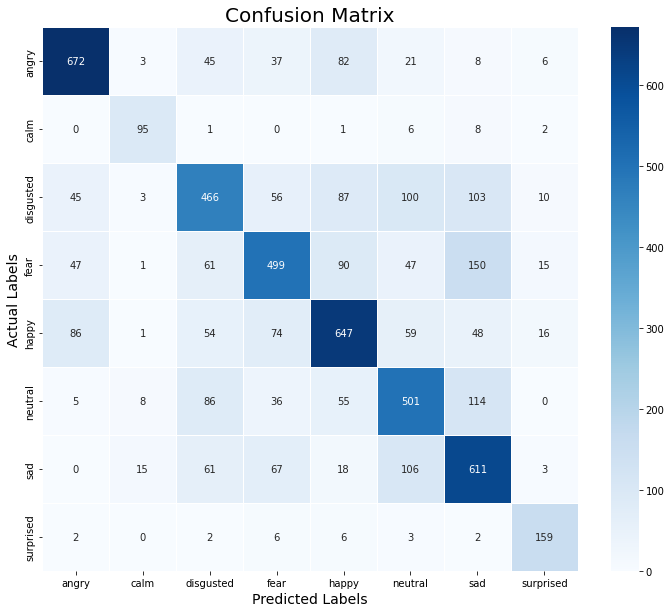

In [173]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [174]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       angry       0.78      0.77      0.78       874
        calm       0.75      0.84      0.79       113
   disgusted       0.60      0.54      0.57       870
        fear       0.64      0.55      0.59       910
       happy       0.66      0.66      0.66       985
     neutral       0.59      0.62      0.61       805
         sad       0.59      0.69      0.63       881
   surprised       0.75      0.88      0.81       180

    accuracy                           0.65      5618
   macro avg       0.67      0.69      0.68      5618
weighted avg       0.65      0.65      0.65      5618

